In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [21]:
saleslog = pd.read_csv("Sales.csv")
saleslog.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [8]:
saleslog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [9]:
saleslog['Payment'].sum()

144443100

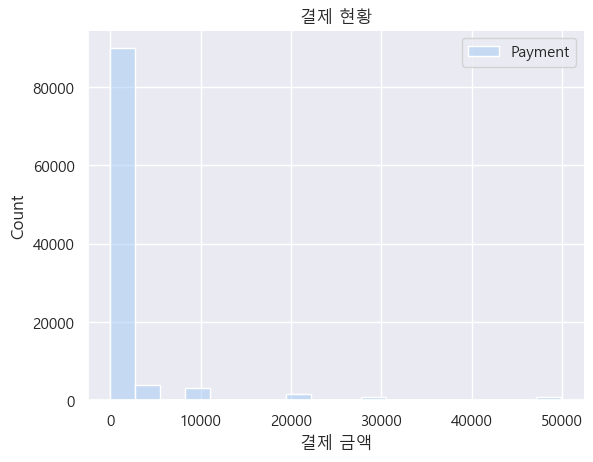

In [10]:
sns.histplot(data=saleslog)
plt.title("결제 현황")
plt.xlabel("결제 금액")
plt.show()

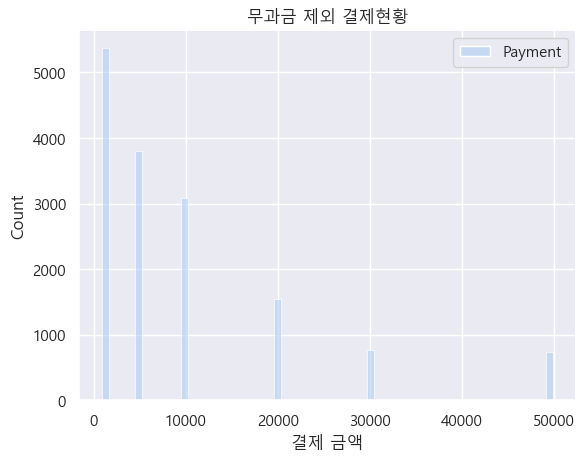

In [11]:
# 무과금 제외 보기
sales = saleslog[saleslog["Payment"] != 0]
sns.histplot(data = sales)
plt.title("무과금 제외 결제현황")
plt.xlabel("결제 금액")
plt.show()

In [12]:
sales.describe()

,Payment
count,15309.000000
mean,9435.175387
std,11897.228643
min,900.000000
25%,900.000000
50%,4900.000000
75%,9900.000000
max,49900.000000


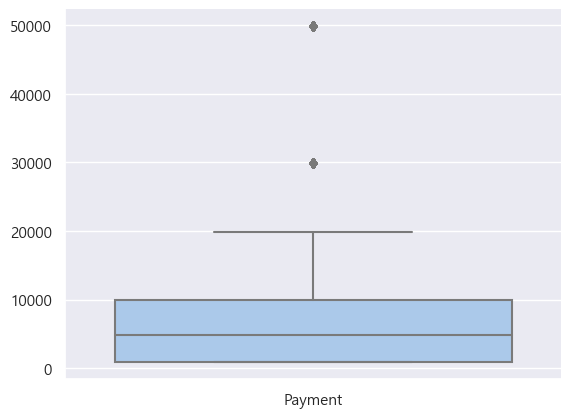

In [14]:
sns.boxplot(data=sales)
plt.show()

In [17]:
#결제 금액 비율 구하기
sales["Payment"].value_counts()

Payment
900      5369
4900     3807
9900     3086
19900    1544
29900     766
49900     737
Name: count, dtype: int64

In [18]:
sales["Payment"].value_counts()/len(sales["Payment"])

Payment
900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: count, dtype: float64

In [22]:
saleslog["Month"] = saleslog["Time_stamp"].str[:7]

In [24]:
saleslog.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


In [25]:
saleslog["Payment"].groupby(saleslog["Month"]).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

데이터를 확인해보면 1월결제금액은 없음

In [39]:
temp_data = saleslog["Payment"].groupby(saleslog["Month"]).sum()
temp_data

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

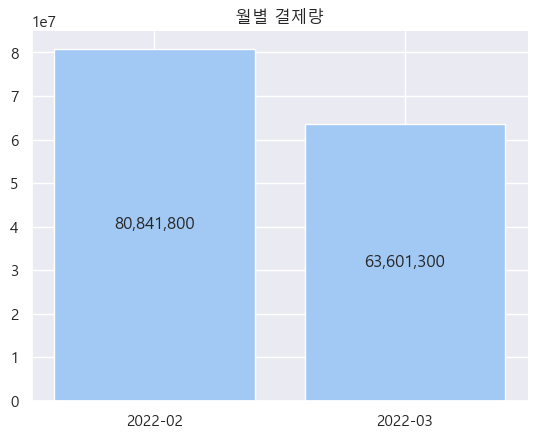

In [41]:
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f"{i:,}" for i in temp_data], label_type="center") # 막대그래프에 라벨 입력방법
plt.title("월별 결제량")
plt.show()

In [59]:
sales02 = saleslog[(saleslog["Month"] == "2022-02") & (saleslog["Payment"] != 0)]
sales02.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


In [60]:
sales02.sort_values("Time_stamp", inplace=True)
sales02

C:\Users\김영준\AppData\Local\Temp\ipykernel_2888\3690650087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales02.sort_values("Time_stamp", inplace=True)


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
1754,2022-01-18,2022-02-01,MineGround,play,29900,nemo964,2022-02
7988,2022-01-23,2022-02-01,SoccerManager,play,49900,eius506,2022-02
2330,2022-01-07,2022-02-01,MineGround,play,4900,nulla585,2022-02
9837,2022-01-25,2022-02-01,SoccerManager,play,19900,et490,2022-02
297,2022-01-02,2022-02-01,MineGround,play,900,in683,2022-02
...,...,...,...,...,...,...,...
10463,2022-01-03,2022-02-27,SoccerManager,play,9900,tenetur626,2022-02
10462,2022-01-30,2022-02-27,SoccerManager,play,9900,iusto107,2022-02
10452,2022-01-20,2022-02-27,SoccerManager,play,9900,voluptate925,2022-02
8069,2022-01-15,2022-02-27,SoccerManager,play,4900,quo933,2022-02


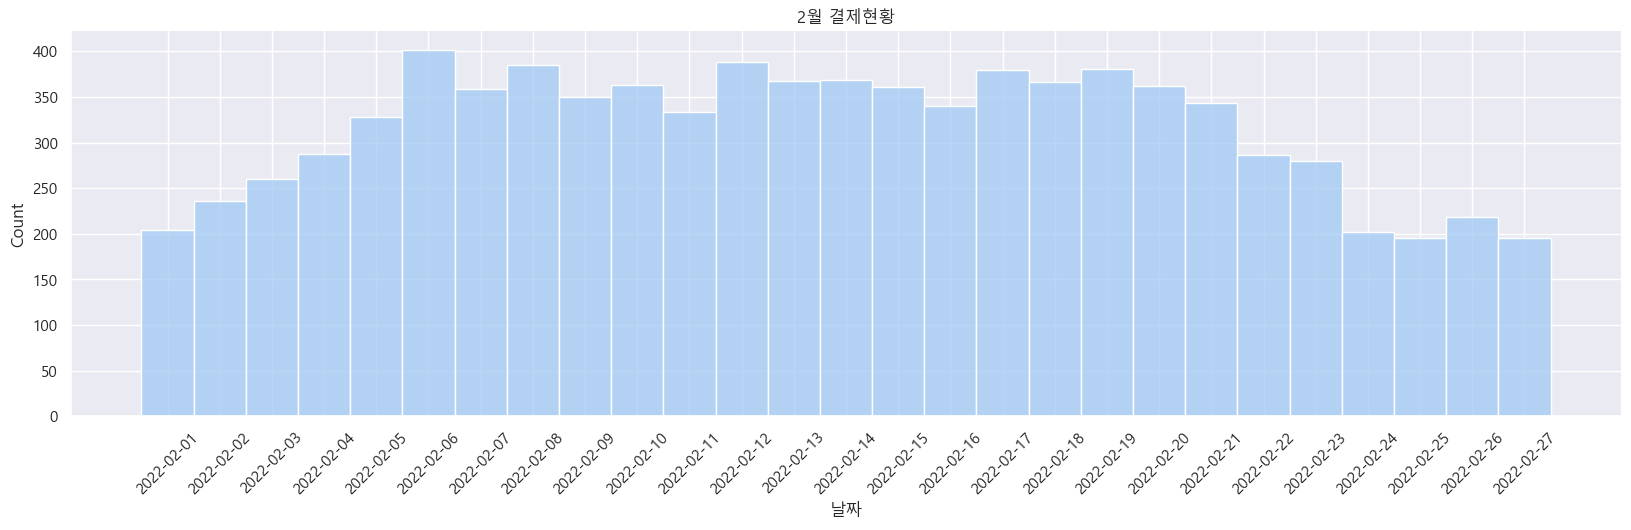

In [63]:
temp_data = sales02["Payment"].groupby(sales02["Time_stamp"]).sum()
plt.figure(figsize=(20,5))
sns.histplot(data=sales02, x="Time_stamp")
plt.xticks(rotation=45)
plt.title("2월 결제현황")
plt.xlabel("날짜")
plt.show()